In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join
import seaborn as sns

In [14]:
dataset_folder_path = 'Dataset/'

circuits = pd.read_csv(f'{dataset_folder_path}{"circuits.csv"}')
drivers = pd.read_csv(f'{dataset_folder_path}{"drivers.csv"}')
laptimes = pd.read_csv(f'{dataset_folder_path}{"lap_times.csv"}')
races = pd.read_csv(f'{dataset_folder_path}{"races.csv"}')
results = pd.read_csv(f'{dataset_folder_path}{"results.csv"}')
status = pd.read_csv(f'{dataset_folder_path}{"status.csv"}')

In [15]:
top_100 = pd.read_csv(f'{dataset_folder_path}{"top_100_races_f1.csv"}')
top_100

,Ranking,raceId,circuitId,name,rating,year
0,1,879,18,Brazilian Grand Prix,9.45,2012
1,2,1020,10,German Grand Prix,9.44,2019
2,3,843,17,Chinese Grand Prix,9.24,2011
3,4,906,7,Canadian Grand Prix,9.19,2014
4,5,910,11,Hungarian Grand Prix,9.14,2014
...,...,...,...,...,...,...
95,96,855,22,Japanese Grand Prix,7.57,2011
96,97,975,7,Canadian Grand Prix,7.55,2017
97,98,353,35,South Korean Grand Prix,7.54,2010
98,99,970,17,Chinese Grand Prix,7.53,2017


In [16]:
top_100['name'].unique()

array(['Brazilian Grand Prix', 'German Grand Prix', 'Chinese Grand Prix',
       'Canadian Grand Prix', 'Hungarian Grand Prix',
       'United States Grand Prix', 'Bahrain Grand Prix',
       'Russian Grand Prix', 'Turkish Grand Prix', 'British Grand Prix',
       'Austrian Grand Prix', 'Abu Dhabi Grand Prix', 'Sakhir Grand Prix',
       'Azerbaijan Grand Prix', 'European Grand Prix',
       'Spanish Grand Prix', 'Australian Grand Prix',
       'Malaysian Grand Prix', 'Italian Grand Prix', 'Belgian Grand Prix',
       'Sao Paulo Grand Prix', 'French Grand Prix', 'Monaco Grand Prix',
       'Emilia-Romagna Grand Prix', 'Saudi Arabian Grand Prix',
       'Japanese Grand Prix', 'South Korean Grand Prix'], dtype=object)

In [17]:
top_100['year'].unique()

array([2012, 2019, 2011, 2014, 2015, 2021, 2020, 2022, 2017, 2018, 2008,
       2016, 2010, 2009, 2013], dtype=int64)

In [18]:
type_top_100 = {
    "Ranking": str,
    "raceId": int,
    "circuitId": int,
    "name": str,
    "rating": float,
    "year": int
}
top_100 = top_100.astype(type_top_100, errors="ignore")
top_100.dropna(how="any", inplace=True)

In [19]:
year_colors={
    2008: 'rebeccapurple',
    2009: 'blue',
    2010: 'lime',
    2011: 'orange',
    2012: 'skyblue',
    2013: 'red',
    2014: 'turquoise',
    2015: 'yellow',
    2016: 'darkgreen',
    2017: 'khaki',
    2018: 'hotpink',
    2019: 'aqua',
    2020: 'crimson',
    2021: 'darkolivegreen',
    2022: 'sandybrown'
}


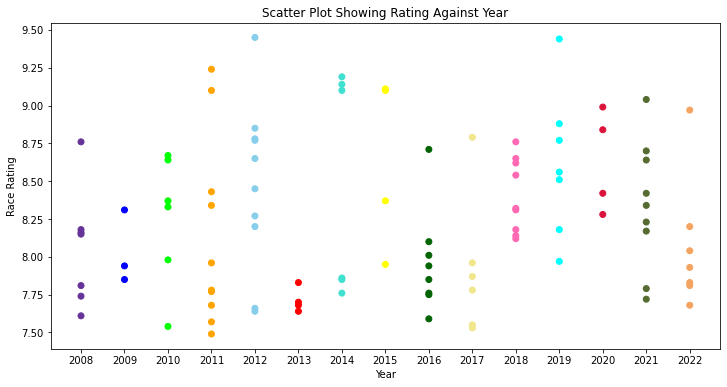

In [20]:
#Scatter plot rating vs year
plt.figure(figsize=(12,6))
plt.scatter(x=top_100['year'], y=top_100['rating'], color=[year_colors[year] for year in top_100["year"]])
plt.title("Scatter Plot Showing Rating Against Year")
plt.xlabel("Year")
plt.ylabel("Race Rating")
plt.xticks(top_100['year'].unique())
plt.show()


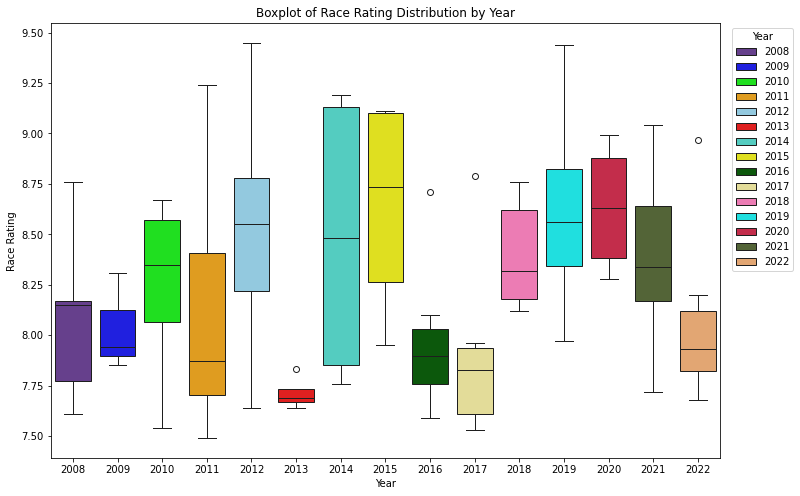

In [57]:
#Boxplot for race rating
plt.figure(figsize=(12,8))
sns.boxplot(x='year', y='rating', data=top_100, hue='year', palette=year_colors)
plt.title("Boxplot of Race Rating Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Race Rating")
plt.legend(title="Year", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

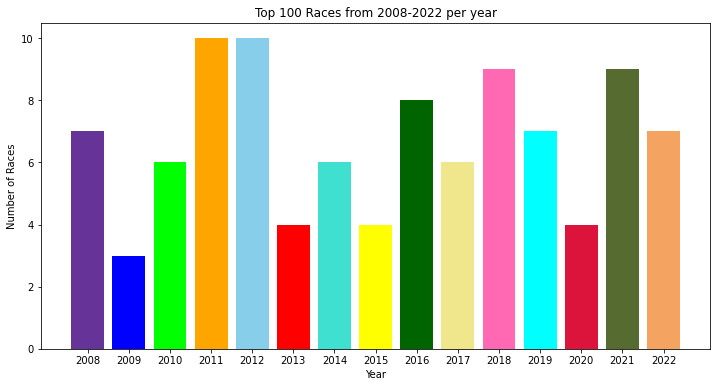

In [22]:
#Number of races per year
race_counts = top_100.groupby('year')['name'].count()

plt.figure(figsize=(12,6))
plt.bar(x=race_counts.index, height=race_counts.values, color=[year_colors[year] for year in race_counts.index])
plt.title("Top 100 Races from 2008-2022 per year")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.xticks(top_100['year'].unique())
plt.show()

In [23]:
race_counts

year
2008     7
2009     3
2010     6
2011    10
2012    10
2013     4
2014     6
2015     4
2016     8
2017     6
2018     9
2019     7
2020     4
2021     9
2022     7
Name: name, dtype: int64

In [66]:
top_100_circuits = pd.merge(top_100, circuits, on="circuitId", how="left")
top_100_circuits = top_100_circuits.drop(['lat', 'lng', 'alt', 'name_x'], axis=1)
top_100_circuits = top_100_circuits.rename(columns={'name_y': 'name'})
top_100_circuits

,Ranking,raceId,circuitId,rating,year,circuitRef,name,location,country
0,1,879,18,9.45,2012,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil
1,2,1020,10,9.44,2019,hockenheimring,Hockenheimring,Hockenheim,Germany
2,3,843,17,9.24,2011,shanghai,Shanghai International Circuit,Shanghai,China
3,4,906,7,9.19,2014,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
4,5,910,11,9.14,2014,hungaroring,Hungaroring,Budapest,Hungary
...,...,...,...,...,...,...,...,...,...
95,96,855,22,7.57,2011,suzuka,Suzuka Circuit,Suzuka,Japan
96,97,975,7,7.55,2017,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
97,98,353,35,7.54,2010,yeongam,Korean International Circuit,Yeongam County,Korea
98,99,970,17,7.53,2017,shanghai,Shanghai International Circuit,Shanghai,China
